In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
 i='CIFAR10'
 dataset_func = getattr(torchvision.datasets, i)


<class 'torchvision.datasets.cifar.CIFAR10'>


In [5]:
trainset= dataset_func(root='../data', train=True, download=True, transform=torchvision.transforms.ToTensor())
trainloader = DataLoader(trainset, batch_size=100, shuffle=True)

100%|██████████| 170498071/170498071 [00:03<00:00, 51252664.59it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data


In [3]:

######pre-trained
vgg16= torchvision.models.vgg16(pretrained=True)
#vgg16.classifier.add_module('add_linear', nn.Linear(1000, 10))
#vgg16.classifier[6] = nn.Linear(4096, 10)
print(vgg16)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 112MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [4]:
vgg16.classifier.add_module('add_linear', nn.Linear(1000, 10))

In [6]:
vgg16.classifier[6] = nn.Linear(4096, 10)
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [11]:

#torch.save(vgg16.state_dict(), "vgg16_method_1.pth")
##method_2: save model and parameter
#vgg16 = torchvision.models.vgg16(pretrained=False)
torch.save(vgg16, "vgg16_method_2.pth")

#####load
#method_1: save parameter
#vgg16 = torchvision.models.vgg16(pretrained=False)
#vgg16.load_state_dict(torch.load("vgg16_method_1.pth"))
##method_2: save model and parameter
#model = torch.load("vgg16_method_2.pth")

In [8]:
vgg16.load_state_dict(torch.load("vgg16_method_1.pth"))

<All keys matched successfully>

In [12]:
model = torch.load("vgg16_method_2.pth")

In [13]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Define Network Class ResNet:

In [ ]:
class BasicBlock(nn.Module):
  expansion = 1 #the number of output channels is x times the number of input channels
  def __init__(self, in_channel, out_channel, stride=1, downsample=None, **kwargs):
    super(BasicBlock, self).__init__() #initialization of the parent class
    self.conv1=nn.Conv2d(in_channels=in_channel, out_channels=out_channel,
                         kernel_size=3, stride=stride, padding=1, bias=False) # in_channels and out_channels are required, stride has default value of 1
    self.bn1 = nn.BatchNorm2d(out_channel) #specify only the number of output channels, and the layer takes care of the normalization for each channel in the input data during training
    self.relu = torch.nn.ReLU()
    self.conv2 = nn.Conv2d(in_channels=out_channel, out_channels=out_channel,
                           kernel_size=3, stride=1, padding=1, bias=False)
    self.bn2 = nn.BatchNorm2d(out_channel)
    self.downsample = downsample
    #torch.nn.Linear(100, 200), torch.nn.Softmax()

  def forward(self, x):
    identity = x
    if self.downsample is not None: #1*1 convolution and batch normalization
        identity = self.downsample(x)
    out = self.conv1(x)
    out = self.bn1(out)
    out = self.relu(out)
    out = self.conv2(out)
    out = self.bn2(out)
    out += identity
    out = self.relu(out)
    return out


In [ ]:
#test = BasicBlock(64,64,8,4)
#(64,64,8,4) (64, 64, kernel_size=(3, 3),stride=(8, 8), padding=(1, 1))
#print('The BasicBlock:')
#print(test)

In [ ]:
#class Bottleneck(nn.Module):

In [ ]:
class ResNet(nn.Module):
  def __init__(self,block,blocks_num,num_classes=1000,include_top=True,groups=1,width_per_group=64):
    #Conditional Top Layers: If include_top is set to True, an adaptive average pooling layer (avgpool) and a fully connected layer (fc) are added at the end of the network
    #num_classes: Number of output classes (default is set to 1000 for ImageNet)
    #groups and width_per_group: used when creating the blocks in each layer, controlling the number of groups and width of each group
    super(ResNet, self).__init__()
    self.include_top = include_top
    self.in_channel = 64
    self.groups = groups
    self.width_per_group = width_per_group
    self.conv1 = nn.Conv2d(3, self.in_channel, kernel_size=7, stride=2,
                               padding=3, bias=False)
    self.bn1 = nn.BatchNorm2d(self.in_channel)
    self.relu = nn.ReLU(inplace=True)
    self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
    self.layer1 = self._make_layer(block, 64, blocks_num[0])
    self.layer2 = self._make_layer(block, 128, blocks_num[1], stride=2)
    self.layer3 = self._make_layer(block, 256, blocks_num[2], stride=2)
    self.layer4 = self._make_layer(block, 512, blocks_num[3], stride=2)
    if self.include_top: #whether to inlcude fc in the last layer for classification, true=ap+linear, otherwise the network only get features
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))  # output size = (1, 1)
        self.fc = nn.Linear(512 * block.expansion, num_classes)
    for m in self.modules(): #apply kaiming approach to cov initialization
        if isinstance(m, nn.Conv2d):
            nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')

  def _make_layer(self, block, channel, block_num, stride=1):
      downsample = None
      if stride != 1 or self.in_channel != channel * block.expansion:
          downsample = nn.Sequential(
              nn.Conv2d(self.in_channel, channel * block.expansion, kernel_size=1, stride=stride, bias=False),
              nn.BatchNorm2d(channel * block.expansion))

      layers = []
      layers.append(block(self.in_channel,
                            channel,
                            downsample=downsample, #the first layer might need to be downsampled
                            stride=stride,
                            groups=self.groups,
                            width_per_group=self.width_per_group))
      self.in_channel = channel * block.expansion

      for _ in range(1, block_num): #range(1,2)=1
          layers.append(block(self.in_channel,
                                channel,
                                groups=self.groups,
                                width_per_group=self.width_per_group))

      return nn.Sequential(*layers) #as layer 1,2..


  def forward(self, x):
    x = self.conv1(x)
    x = self.bn1(x)
    x = self.relu(x)
    x = self.maxpool(x)
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    x = self.layer4(x)
    if self.include_top:
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
    return x

  #def resnet18(num_classes=1000, include_top=True):
  #  return ResNet(BasicBlock, [2, 2, 2, 2], num_classes=num_classes, include_top=include_top)
    #pretrain: torchvision.models.resnet18(pretrained=True)


Read Dataset:

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='../data', train=True, download=True, transform=torchvision.transforms.ToTensor())
trainloader = DataLoader(trainset, batch_size=100, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='../data', train=False, download=True, transform=torchvision.transforms.ToTensor())
testloader = DataLoader(testset, batch_size=100, shuffle=False)
#transform = transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

Files already downloaded and verified
Files already downloaded and verified


Define Training Setting:

In [ ]:
#define loss and optim
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model=ResNet(BasicBlock, [2, 2, 2, 2], num_classes=1000, include_top=True).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
#optimizer = torch.optim.Adam(params, lr=0.0001)

#save
save_path = './cifar_net.pth'
#torch.save(model.state_dict(), save_path)

In [ ]:
#def reset_bn_parameters(model):
#    for m in model.modules():
#        if isinstance(m, nn.BatchNorm2d):
#            m.reset_parameters()

#reset_bn_parameters(model)

Training:

In [ ]:
def save_plots(train_acc, valid_acc, train_loss, valid_loss, name=None):
    """
    Function to save the loss and accuracy plots to disk.
    """
    # Accuracy plots.
    plt.figure(figsize=(10, 7))
    plt.plot(train_acc, color="tab:blue", linestyle="-", label="train accuracy")
    plt.plot(valid_acc, color="tab:red", linestyle="-", label="validataion accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.savefig(os.path.join("outputs", name + "_accuracy.png"))

    # Loss plots.
    plt.figure(figsize=(10, 7))
    plt.plot(train_loss, color="tab:blue", linestyle="-", label="train loss")
    plt.plot(valid_loss, color="tab:red", linestyle="-", label="validataion loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.savefig(os.path.join("outputs", name + "_loss.png"))

In [ ]:
epochs = 30
best_acc = 0.0
train_accuracies = []  # record accuracy for training
train_losses = []  # record loss for training
valid_accuracies = []  # record accuracy for validation
valid_losses = []  # record loss for validation

for epoch in range(epochs):  # loop over the dataset multiple times
    model.train()
    running_loss = 0.0
    correct_train = 0   #count number of correct prediction in this batch
    total_train = 0   #count of all data in this batch

    train_bar=tqdm(trainloader,position=0,leave=True) #file=sys.stdout
    for i, data in enumerate(train_bar):
        images, labels = data # get the inputs; data is a list of [images, labels]
        optimizer.zero_grad() # zero the parameter gradients
        # forward + backward + optimize
        outputs = model(images.to(device)) #output=logit
        loss = criterion(outputs, labels.to(device))
        loss.backward() # Backpropagation
        optimizer.step() # Update the weights

        # print statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1) #igoring the max of every row but return the max of every column, which is the class
        correct_train += (predicted == labels.to(device)).sum().item()
        total_train += labels.size(0)
        train_bar.desc = "train epoch[{}/{}] loss:{:.3f}".format(epoch + 1,
                                                                     epochs,
                                                                loss)
    train_accuracy = correct_train / total_train
    train_accuracies.append(train_accuracy)
    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)


    model.eval()
    correct_valid = 0
    total_valid = 0
    acc = 0.0  # accumulate accurate number / epoch
    with torch.no_grad():
        val_bar = tqdm(testloader)
        for val_data in val_bar:
            val_images, val_labels = val_data
            outputs = model(val_images.to(device))
            # loss = loss_function(outputs, test_labels)
            predict_y = torch.max(outputs, dim=1)[1]
            correct_valid += torch.eq(predict_y, val_labels.to(device)).sum().item()
            total_valid += val_labels.size(0) #=len(testset)
            val_bar.desc = "valid epoch[{}/{}]".format(epoch + 1,
                                                           epochs)

    valid_accuracy = correct_valid / total_valid
    valid_accuracies.append(valid_accuracy)
    valid_losses.append(loss.item())

    val_accurate = acc / len(testset) #val_num=len(testset)
    print('[epoch %d] train_loss: %.3f  val_accuracy: %.3f' %
              (epoch + 1, train_loss, valid_accuracy)) #transteps=len(trainloader)
    # s per iteration, count of iteration = total number of sample / batch size
    if valid_accuracy > best_acc:
        best_acc = valid_accuracy
        torch.save(model.state_dict(), save_path)

print('Finished Training')


valid epoch[1/30]: 100%|██████████| 100/100 [00:24<00:00,  4.09it/s]


[epoch 1] train_loss: 1.778  val_accuracy: 0.487


valid epoch[2/30]: 100%|██████████| 100/100 [00:25<00:00,  3.95it/s]


[epoch 2] train_loss: 1.275  val_accuracy: 0.519


valid epoch[3/30]: 100%|██████████| 100/100 [00:24<00:00,  4.14it/s]


[epoch 3] train_loss: 1.105  val_accuracy: 0.530


valid epoch[4/30]: 100%|██████████| 100/100 [00:24<00:00,  4.17it/s]


[epoch 4] train_loss: 0.958  val_accuracy: 0.592


valid epoch[5/30]: 100%|██████████| 100/100 [00:23<00:00,  4.33it/s]


[epoch 5] train_loss: 0.830  val_accuracy: 0.603


valid epoch[6/30]: 100%|██████████| 100/100 [00:25<00:00,  3.97it/s]


[epoch 6] train_loss: 0.710  val_accuracy: 0.608


valid epoch[7/30]: 100%|██████████| 100/100 [00:25<00:00,  3.87it/s]


[epoch 7] train_loss: 0.596  val_accuracy: 0.610


valid epoch[8/30]: 100%|██████████| 100/100 [00:25<00:00,  4.00it/s]


[epoch 8] train_loss: 0.491  val_accuracy: 0.616


valid epoch[9/30]: 100%|██████████| 100/100 [00:25<00:00,  3.97it/s]


[epoch 9] train_loss: 0.393  val_accuracy: 0.616


valid epoch[10/30]: 100%|██████████| 100/100 [00:25<00:00,  4.00it/s]


[epoch 10] train_loss: 0.313  val_accuracy: 0.608


valid epoch[11/30]: 100%|██████████| 100/100 [00:23<00:00,  4.23it/s]


[epoch 11] train_loss: 0.246  val_accuracy: 0.613


valid epoch[12/30]: 100%|██████████| 100/100 [00:23<00:00,  4.21it/s]


[epoch 12] train_loss: 0.210  val_accuracy: 0.611


valid epoch[13/30]: 100%|██████████| 100/100 [00:23<00:00,  4.21it/s]


[epoch 13] train_loss: 0.171  val_accuracy: 0.628


valid epoch[14/30]: 100%|██████████| 100/100 [00:23<00:00,  4.27it/s]


[epoch 14] train_loss: 0.142  val_accuracy: 0.592


valid epoch[15/30]: 100%|██████████| 100/100 [00:24<00:00,  4.13it/s]


[epoch 15] train_loss: 0.113  val_accuracy: 0.630


valid epoch[16/30]: 100%|██████████| 100/100 [00:24<00:00,  4.15it/s]


[epoch 16] train_loss: 0.093  val_accuracy: 0.628


valid epoch[17/30]: 100%|██████████| 100/100 [00:23<00:00,  4.31it/s]


[epoch 17] train_loss: 0.087  val_accuracy: 0.641


valid epoch[18/30]: 100%|██████████| 100/100 [00:22<00:00,  4.48it/s]


[epoch 18] train_loss: 0.073  val_accuracy: 0.630


valid epoch[19/30]: 100%|██████████| 100/100 [00:23<00:00,  4.23it/s]


[epoch 19] train_loss: 0.069  val_accuracy: 0.629


valid epoch[20/30]: 100%|██████████| 100/100 [00:22<00:00,  4.36it/s]


[epoch 20] train_loss: 0.059  val_accuracy: 0.643


valid epoch[21/30]: 100%|██████████| 100/100 [00:24<00:00,  4.15it/s]


[epoch 21] train_loss: 0.051  val_accuracy: 0.648


valid epoch[22/30]: 100%|██████████| 100/100 [00:23<00:00,  4.17it/s]


[epoch 22] train_loss: 0.041  val_accuracy: 0.638


valid epoch[23/30]: 100%|██████████| 100/100 [00:27<00:00,  3.69it/s]


[epoch 23] train_loss: 0.046  val_accuracy: 0.648


valid epoch[24/30]: 100%|██████████| 100/100 [00:25<00:00,  3.93it/s]


[epoch 24] train_loss: 0.034  val_accuracy: 0.638


valid epoch[25/30]: 100%|██████████| 100/100 [00:22<00:00,  4.42it/s]


[epoch 25] train_loss: 0.031  val_accuracy: 0.640


valid epoch[26/30]: 100%|██████████| 100/100 [00:23<00:00,  4.18it/s]


[epoch 26] train_loss: 0.024  val_accuracy: 0.650


valid epoch[27/30]: 100%|██████████| 100/100 [00:26<00:00,  3.73it/s]


[epoch 27] train_loss: 0.027  val_accuracy: 0.648


valid epoch[28/30]: 100%|██████████| 100/100 [00:25<00:00,  3.91it/s]


[epoch 28] train_loss: 0.029  val_accuracy: 0.652


valid epoch[29/30]: 100%|██████████| 100/100 [00:24<00:00,  4.01it/s]


[epoch 29] train_loss: 0.022  val_accuracy: 0.651


valid epoch[30/30]: 100%|██████████| 100/100 [00:22<00:00,  4.37it/s]

[epoch 30] train_loss: 0.023  val_accuracy: 0.650
Finished Training


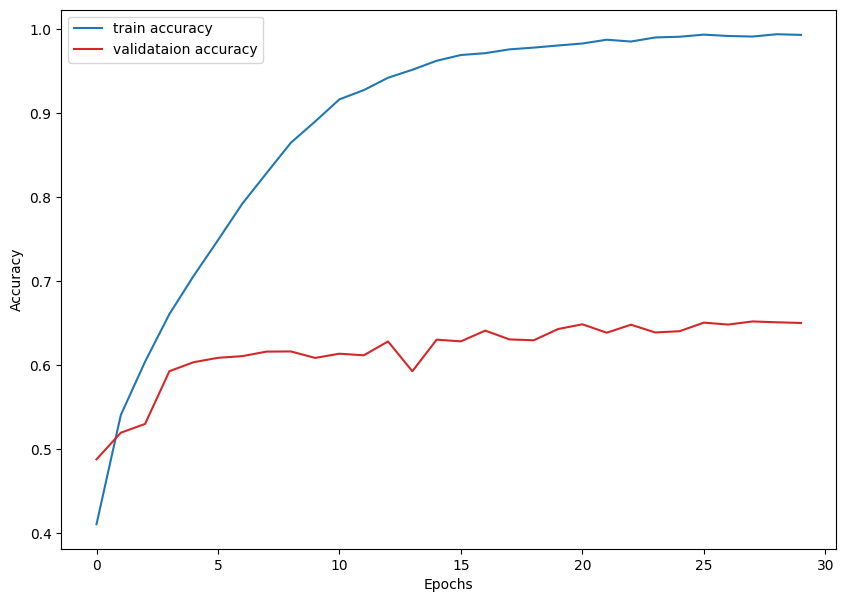

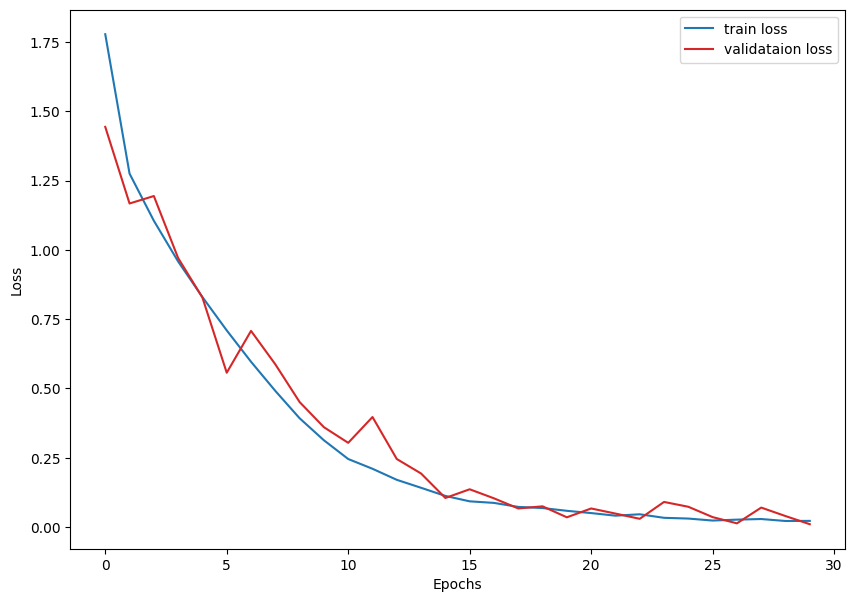

In [ ]:
save_plots(train_accuracies, valid_accuracies, train_losses, valid_losses, name="training_results")